In [1]:
from scipy.sparse import spdiags
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m=8; n=m*m; L=10; dx= (2*L)/m
e0 = np.zeros((n, 1))
e1 = np.ones((n, 1))
e2 = np.copy(e1)
e4 = np.copy(e0)
for j in range(1, m+1):
  e2[m*j-1] = 0
  e4[m*j-1] = 1
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]
e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

diagonals = [e1.flatten(), e1.flatten(), e5.flatten(),
e2.flatten(), -4 * e1.flatten(), e3.flatten(),
e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]
matA = spdiags(diagonals, offsets, n, n).toarray()
A1 = matA / dx**2
A1

array([[-0.64,  0.16,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.16, -0.64,  0.16, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.16, -0.64, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., -0.64,  0.16,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.16, -0.64,  0.16],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.16, -0.64]])

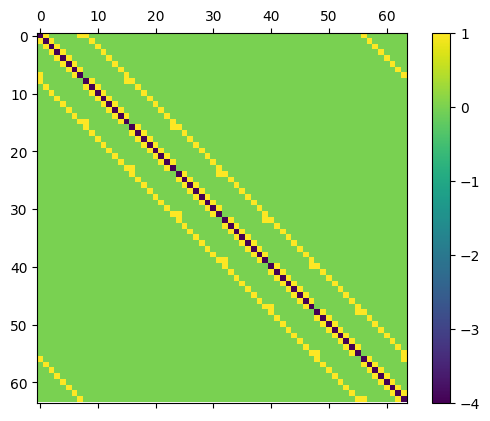

In [42]:
fig, ax = plt.subplots()
cax = ax.matshow(A1)
fig.colorbar(cax)

In [68]:
diagonal_B = [e1.flatten(), -e1.flatten(), e1.flatten(), -e1.flatten()]
offsets_B =  [-(n-m), -m, m, (n-m)]
matB = spdiags(diagonal_B, offsets_B, n, n).toarray()
A2 = matB / (2*dx)
A2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

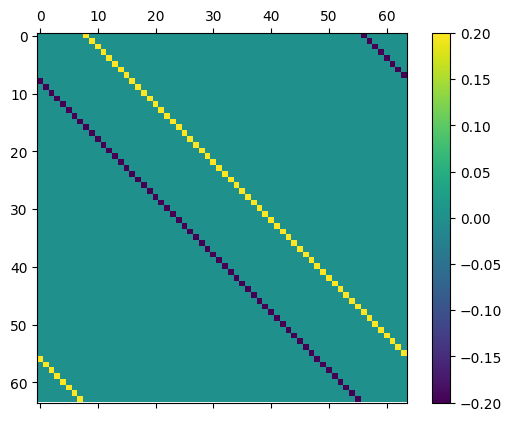

In [69]:
fig, ax = plt.subplots()
cax = ax.matshow(A2)
fig.colorbar(cax)

<ipython-input-72-30d9e994c134>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  e1[i] = e4[i - 1]


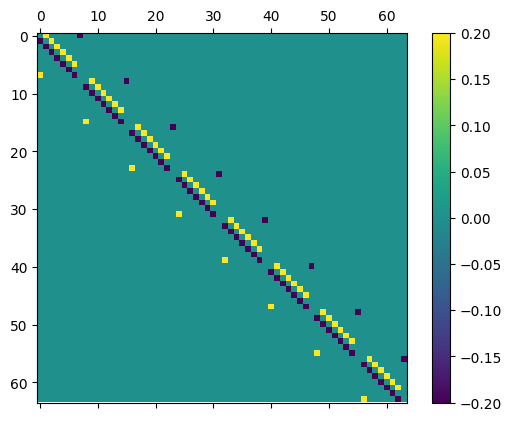

In [72]:
for i in range(1, n):
    e1[i] = e4[i - 1]

diagonal_C = [e1.flatten(), -e2.flatten(), e3.flatten(), -e4.flatten()]
offsets_C = [-m + 1, -1, 1,  m - 1]
matC = spdiags(diagonal_C, offsets_C, n, n).toarray()
A3 = matC / (2*dx)
A3
fig, ax = plt.subplots()
cax = ax.matshow(A3)
fig.colorbar(cax)